# TP 10 : Valeurs et vecteurs propres

Au programme de ce TP :

- La méthode des puissances pour estimer la valeur propre (et son vecteur propre) dominante d'une matrice.
- La méthode de la puissance inverse pour estimer la valeur propre (et son vecteur propre) la plus proche d'une valeur donnée.
- L'itération orthogonale pour estimer plusieurs valeurs propres (et leurs vecteurs propres) à la fois.

Comme votre professeur n'a pas relu le TP, son contenu est susceptible de changer la semaine prochaine.

### Importations des paquets

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import subspace_angles
#from tqdm import tqdm

## Exercice 1 : Méthode de la puissance

Le but de cet exercice est d'implémenter la méthode de la puissance, et de vérifier la théorie vue en cours.

Si besoin, vous pouvez vous référer à l'algorithme 9.10 du polycopié.

- Implémenter la méthode de la puissance.

Remarque: Si vous implémentez un critère d'arrêt, vous pouvez utiliser la norme entre deux itérés successifs $\| \lambda_{k+1} \pmb{v}_{k+1} - \lambda_{k} \pmb{v}_{k} \|_2$. 

In [5]:
def methode_puissance(A, x0, max_iter=1000, tol=1e-6):
    """
    Calcule la valeur propre dominate de A, et son vecteur propre associé.

    Entrées
    -------
    A : np.ndarray
        Matrice carrée de taille (n, n).
    x0 : np.ndarray
        Vecteur de taille n.
    max_iter : int
        Nombre maximal d'itérations.
    tol : float
        Tolérance pour le critère d'arrêt.

    Sorties
    -------
    lk : list
        Liste des valeurs propres calculées à chaque itération.
    vk : list
        Liste des vecteurs propres calculés à chaque itération.
    """
    # VOTRE CODE ICI
    lk = []
    vk = []
    vk.append(x0)
    w = np.zeros(len(A))
    for k in np.arange(max_iter):
        w = A@vk[k]
        print(len(w))
        lk.append(np.conj(w).T @ vk[k])
        if (np.linalg.norm(w) != 0):
            vk.append(w/np.linalg.norm(w))
        else:
            vk.append(w)
        if (k > 0 and np.linalg.norm(lk[k] * vk[k + 1] - lk[k-1]*vk[k]) <= tol):
            return lk, vk
    return lk, vk


    

In [6]:
# Test automatique
Lambda = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
Q, _ = np.linalg.qr(np.random.randn(3, 3))
A = np.dot(Q, np.dot(Lambda, Q.T))
x0 = np.ones(3)
lk, vk = methode_puissance(A, x0)
assert np.allclose(lk[-1], 3), "La valeur propre dominante n'est pas correcte."
assert np.abs(subspace_angles(vk[-1][:, None], Q[:, 2][:, None])), "Le vecteur propre associé n'est pas correct."


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


Comme nous l'avons vu dans le cours, la convergence de la méthode des puissances dépend du "gap" entre la valeur propre dominante et la deuxième valeur propre (en module).

Générez des matrices aléatoires avec les valeurs propres suivantes :
- En escalier : $\mathrm{Spect}(A_1) = \{1, 0.99, 0.98, 0.97, 0.1, 0.099, 0.098, 0.097 \}$;
- À décroissance exponentielle : $\mathrm{Spect}(A_2) = \{1, 0.1, 0.01, \ldots, 1e-15 \}$;
- Avec une seule valeur propre non-nulle : $\mathrm{Spect}(A_3) = \{1, 0, 0, \ldots, 0 \}$;
- Avec deux valeurs propres dominantes exactement identiques : $\mathrm{Spect}(A_4) = \{1, 1, 0.1, 0.01, \ldots, 1e-15 \}$.

Pour générer de telles matrices, vous pouvez construire la diagonale puis générer une (ou deux) matrices aléatoires orthogonales et les multiplier. Voir l'exemple ci-dessous.

```python
import numpy as np

Lambda = np.diag([1, 0.99, 0.98, 0.97, 0.1, 0.099, 0.098, 0.097])
Q1, _ = np.linalg.qr(np.random.randn(8, 8))
A = Q1 @ Lambda @ Q1.T # A est symétrique

Q2, _ = np.linalg.qr(np.random.randn(8, 8))
B = Q1 @ Lambda @ Q2.T # B n'est pas symétrique
```

- Appliquer la méthode des puissances à chacune de ces matrices. Dans chaque cas,
    - Tracer la convergence de la valeur propre $\| \lambda^{(k)} - \lambda_{max} \|$ en fonction de $k$.
    - Tracer la convergence (en angle) du vecteur propre $\sin \theta(\pmb{v}^{(k)}, \pmb{v}_{max})$ en fonction de $k$.
    - Lorsque c'est possible, tracer la convergence asymptotique vue en cours.
- Qu'observez-vous ? Vos résultats sont-ils cohérents avec la théorie ?

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


TypeError: object of type 'numpy.float64' has no len()

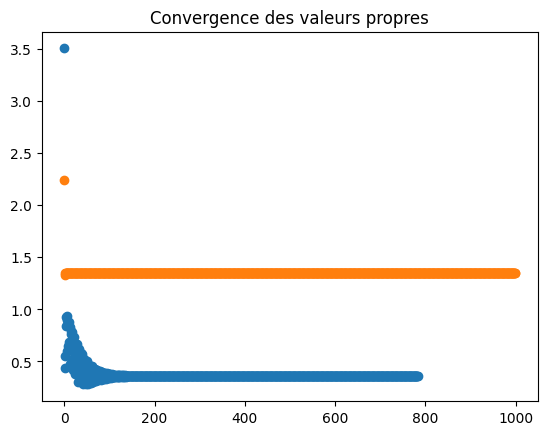

In [7]:
# VOTRE CODE ICI
lambda_1 = np.diag([1, 0.99, 0.98, 0.97, 0.1, 0.099, 0.098, 0.097])
Q_1, _ = np.linalg.qr(np.random.randn(8, 8))
Q_2, _ = np.linalg.qr(np.random.randn(8, 8))
A_1 = Q_1 @ lambda_1 @ Q_2.T

indice = 15
liste = []
liste_2 = []
liste.append(1.0)
liste_2.append(1.0)
liste_2.append(1.0)
for i in np.arange(indice):
    liste.append(liste[i]/10.0)
    liste_2.append(liste_2[i + 1]/10.0)
lambda_2 = np.diag(liste)
lambda_4 = np.diag(liste_2)
Q_3, _ = np.linalg.qr(np.random.randn(len(liste), len(liste)))
Q_4, _ = np.linalg.qr(np.random.randn(len(liste), len(liste)))
Q_5, _ = np.linalg.qr(np.random.randn(len(liste_2), len(liste_2)))
Q_6, _ = np.linalg.qr(np.random.randn(len(liste_2), len(liste_2)))
A_2 = Q_3 @ lambda_2 @ Q_4.T
lambda_3 = np.zeros(len(liste))
lambda_3[0] = 1.0
A_3 = Q_4 @ lambda_3 @ Q_3.T
A_4 = Q_5 @ lambda_4 @ Q_6.T

plt.title('Convergence des valeurs propres')
for i in [A_1, A_2, A_3, A_4]:
    l, v = methode_puissance(i, np.random.randn(len(i)), 1000, 1e-12)
    y = []
    x = []
    for j in np.arange(len(l)):
        y.append(np.linalg.norm(l[j] - 1))
        x.append(j)
    plt.plot(x, y, 'o')
plt.show()





*Vos observations ici*
Elles oscillent



## Exercice 2 : Méthode de la puissance inverse

L'idée de la méthode de la puissance inverse est de translater (shift $\sigma$) la matrice $A$ puis l'inverser pour faire en sorte que la valeur propre que l'on cherche devienne la valeur propre dominante de la matrice translatée-inversée.

Si besoin, vous pouvez vous référer à l'algorithme 9.11 du polycopié.

**Attention:** Dans le reste de l'exercice, nous utiliserons des valeurs propres complexes. Comme dans le TP9, faites attention à bien utiliser des nombres complexes (`np.complex128`) et non des nombres réels (`np.float64`).

- Implémenter la méthode de la puissance inverse (qui supporte les nombres complexes).


In [9]:
def methode_puissance_inverse(A, x0, sigma, max_iter=1000, tol=1e-6):
    """
    Calcule la valeur propre de A la plus proche de sigma et son vecteur propre associé.

    Entrées
    -------
    A : np.ndarray
        Matrice carrée de taille (n, n).
    x0 : np.ndarray
        Vecteur de taille n.
    mu : float
        Valeur autour de laquelle on cherche la valeur propre.
    max_iter : int
        Nombre maximal d'itérations.
    tol : float
        Tolérance pour le critère d'arrêt.

    Sorties
    -------
    lk : list
        Liste des valeurs propres calculées à chaque itération.
    vk : list
        Liste des vecteurs propres calculés à chaque itération.
    """
    # VOTRE CODE ICI
    lk = []
    vk = []
    if (np.linalg.norm(x0) != 1):
        print("La norme de y(0) doit être égale à 1 !!!")
        vk.append(x0/np.linalg.norm(x0))
    else:
        vk.append(x0)
    for k in np.arange(max_iter):
        w = np.linalg.solve((A - sigma * np.eye(len(A))), vk[k])
        if (np.linalg.norm(w) != 0):
            vk.append(w/np.linalg.norm(w))
        else:
            vk.append(w)
        lk.append(np.conj(vk[k + 1].T)@A@vk[k + 1])
    return lk, vk
    

In [10]:
# Test automatique
Lambda = np.array([[3 + 1j, 0, 0], [0, 2 + 2j, 0], [0, 0, 1 + 1j]])
Q, _ = np.linalg.qr(np.random.randn(3, 3))
A = np.dot(Q, np.dot(Lambda, Q.T))
x0 = np.random.randn(3)
mu = 3
lk, vk = methode_puissance_inverse(A, x0, mu)
assert np.allclose(lk[-1], 3 + 1j), "La valeur propre la plus proche n'est pas correcte."
assert np.abs(subspace_angles(vk[-1][:, None], Q[:, 0][:, None])), "Le vecteur propre associé n'est pas correct."


La norme de y(0) doit être égale à 1 !!!


Maintenant, l'idée est d'appliquer la méthode de la puissance inverse à une matrice $A$ dont on connaît les valeurs propres, et d'étudier la convergence de la méthode en fonction du choix de $\sigma$.

Soit une matrice inversible $T \in \mathbb{R}^{4 \times 4}$, considérons la matrice  
$$ A = T \begin{pmatrix} 1 + i & & & \\ & 1 - i & & \\ & & -1 + i & \\ & & & -1 - i \end{pmatrix} T^{-1}.$$

Ses valeurs propres sont donc $\mathrm{Spect}(A) = \{1 + i, 1 - i, -1 + i, -1 - i \}$.


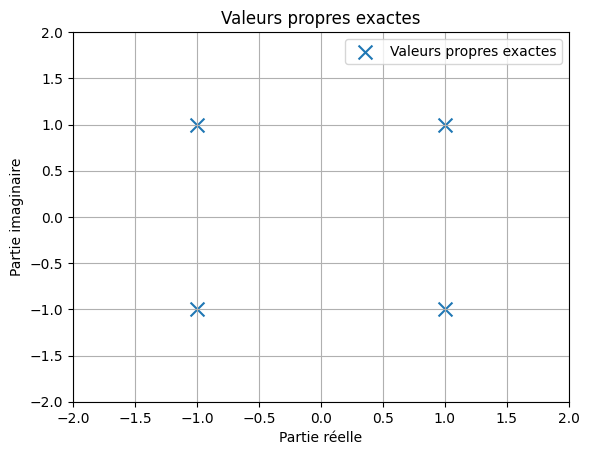

In [11]:
# Génération de la matrice T
T = np.random.rand(4, 4)
Lambda = np.diag([1+1j, 1-1j, -1+1j, -1-1j])
A = np.dot(T, np.dot(Lambda, np.linalg.inv(T)))

# Plot des valeurs propres
plt.figure()
plt.scatter(np.real(np.diag(Lambda)), np.imag(np.diag(Lambda)), marker='x', s=100, label='Valeurs propres exactes')
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Partie réelle")
plt.ylabel("Partie imaginaire")
plt.title("Valeurs propres exactes")
plt.legend()
plt.show()


- Pour cette matrice $A$, choisir une valeur $\sigma$ et tracer les itération de $\lambda_k$ sur le plan complexe.

In [ ]:
# VOTRE CODE ICI


Similairement à la fractale de Newton dans le TP8, on peut définir les bassins d'attractions des valeurs propres de $A$.

$$\mathcal B_i(A) = \left\{\sigma \mid \text{la méthode de la puissance converge vers } \lambda_i \right\}.$$

Ainsi, on peut donc tracer les bassins d'attractions des valeurs propres de $A$ en choisissant une grille de points $z$ et en colorant chaque point $z$ selon la valeur propre vers laquelle la méthode des puissances inverses converge.

- Tracer les bassins d'attractions des valeurs propres de la matrice $A$ donnée précédemment.
- Qu'observez-vous ? Est-ce ce à quoi vous vous attendiez ?


In [ ]:
# VOTRE CODE ICI
            

*Votre observation ici*


## Exercice 3 : L'itération orthogonale

L'itération orthogonale permet, similairement à la méthode de la puissance, de calculer plusieurs valeurs propres dominantes d'une matrice $A$ simultanément, ainsi que leurs vecteurs propres associés.

Si besoin, vous pouvez vous référer à l'algorithme 8.18 du polycopié.

- Implémenter l'itération orthogonale.
  

In [ ]:
def iteration_orthogonale(A, X0, p, max_iter=1000, tol=1e-12):
    """
    Itération orthogonale pour calculer plusieurs valeurs propres dominantes de A.

    Entrées
    -------
    A : np.ndarray
        Matrice carrée de taille (n, n).
    X0 : np.ndarray
        Matrice orthogonale de taille (n, p).
    p : int
        Nombre de valeurs propres à calculer.
    nb_iter : int
        Nombre d'itérations.
    tol : float
        Tolérance pour le critère d'arrêt.

    Sorties
    -------
    Lk: list
        Liste des valeurs propres calculées à chaque itération.
    Vk: list
        Liste des vecteurs propres calculés à chaque itération.
    """
    # VOTRE CODE ICI



In [ ]:
# Test automatique
np.random.seed(0)
Lambda = np.diag([5, 4, 3, 2, 1])
Q, _ = np.linalg.qr(np.random.randn(5, 5))
A = Q.dot(Lambda).dot(Q.T)
p = 3
X0, _ = np.linalg.qr(np.random.randn(5, p))

Lk, Vk = iteration_orthogonale(A, X0, p)
assert np.allclose(Lk[-1], Lambda[:p, :p], atol=1e-6), "Erreur dans la méthode des puissances inverses"
assert np.allclose(np.abs(Vk[-1]), np.abs(Q[:, :p]), atol=1e-6), "Erreur dans la méthode des puissances inverses"


- Générer une matrice symétrique aléatoire $A \in \mathbb{R}^{20 \times 20}$ et estimer ses $5$ valeurs propres dominantes avec `iteration_orthogonale`. Comparer avec les valeurs propres calculées par `np.linalg.eigvalsh`.
- Pour les cinq valeurs propres dominantes $\lambda_i$, $i= 1, \ldots, 5$, tracer la convergence de la valeur propre $\| \lambda_i^{(k)} - \lambda_i \|$ en fonction de $k$.

In [ ]:
# Matrice symétrique aléatoire
n = 20
p = 5
np.random.seed(0)
A = np.random.randn(n, n)
A = A + A.T
X0, _ = np.linalg.qr(np.random.randn(n, p))

# VOTRE CODE ICI




